In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from warnings import filterwarnings


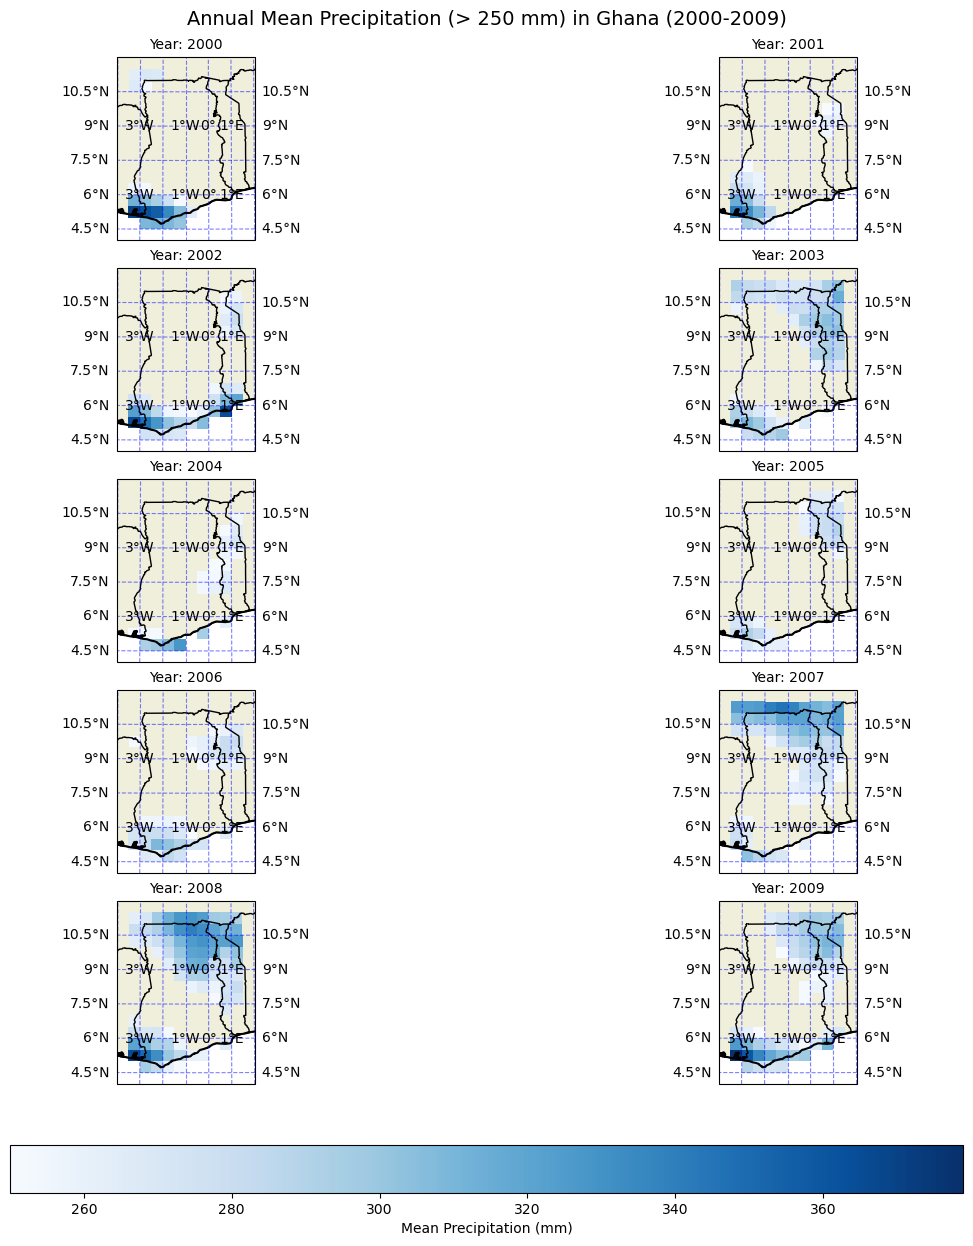

In [11]:
da = xr.open_dataset('Africa_cru_data.nc')['pre']

ghana_precip = da.sel(
    lat=slice(4.5, 11.5),  
    lon=slice(-3.5, 1.5),  
    time=slice('2000', '2009')  
)

annual_mean_precip = ghana_precip.where(ghana_precip > 250).groupby('time.year').mean(dim='time')

projection = ccrs.LambertConformal(
    central_longitude=-1.0,  
    central_latitude=8.0,  
    standard_parallels=(5.0, 10.0)  
)
fig, axes = plt.subplots(
    nrows=5, ncols=2, figsize=(12, 12),
    subplot_kw={'projection': projection},
    constrained_layout=True
)
axes = axes.flatten()
years = annual_mean_precip.year.values  
for i, year in enumerate(years):
    ax = axes[i]
    plot = annual_mean_precip.sel(year=year).plot(
        ax=ax,
        transform=ccrs.PlateCarree(), 
        cmap='Blues',  
        vmin=250, vmax=annual_mean_precip.max(), 
        add_colorbar=False 
    )
    ax.set_title(f'Year: {year}', fontsize=10)
    ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
    ax.add_feature(cfeature.BORDERS, linewidth=1.0)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True, linestyle='--', color='blue', alpha=0.5)
cbar = fig.colorbar(
    plot, ax=axes, orientation='horizontal', pad=0.05,
    label='Mean Precipitation (mm)', shrink=0.8
)
fig.suptitle('Annual Mean Precipitation (> 250 mm) in Ghana (2000-2009)', fontsize=14, y=1.02)
plt.show()